In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")
# from pandas import Series,DataFrame

In [ ]:
rcParams['figure.figsize'] = 10,6

In [ ]:
df_emp=pd.read_csv("employee_compensation.csv")
df_emp.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


**We are going to build a model that will predict the compensation**

In [ ]:
# salary + overtime + other_salaries = Total Salary
# retirement + health/Dental + other benefits = Total_Benefits
# presence of multicollinearity.

There will be correlation between the data points for Total Salary and Total Benefits

### Procedure for Solving the Problems

1. Univariate Analysis.
2. Outlier Treatment.
3. Missing Value Treatment.
4. Univariate.
5. Bivariate. - Num vs Num (Scatter Plot). Cat vs Num(Boxplot)
6. Multivariate.
7. Feature Engineering.
8. Scaling and Transformation.

### Modelling

1. Split the Data into Train and Test.
2. Build the Model- Linear Regression.
3. Evaluate the performance - r2 , RMSE.
4. Underfitting vs Overfitting (Bias vs Variance).
5. Assumption of the Model.
7. Cross validation Approach and Feature Selection.
6. If Assumptions fail - then apply Decision Tree, Random Forest, Bagging, Boosting models are build.

### Remove Insignificant Variables

1. Year is categorical. You cannot do operation on it
2. Emp Id is not required.

In [ ]:
df_emp.drop(['Employee_Identifier','Year'],axis=1,inplace=True)
df_emp.head()

,Year_Type,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [ ]:
df_emp.shape

(50000, 10)

### Pre Checks

In [ ]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Type           50000 non-null  object 
 1   Salaries            50000 non-null  float64
 2   Overtime            50000 non-null  float64
 3   Other_Salaries      50000 non-null  float64
 4   Total_Salary        50000 non-null  float64
 5   Retirement          50000 non-null  float64
 6   Health/Dental       50000 non-null  float64
 7   Other_Benefits      50000 non-null  float64
 8   Total_Benefits      50000 non-null  float64
 9   Total_Compensation  50000 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.8+ MB


**Seperate the Numerical variables**

In [ ]:
# exclude=np.number will return all categorical data
cols=list(df_emp.select_dtypes(include=np.number).columns)
cols

['Salaries',
 'Overtime',
 'Other_Salaries',
 'Total_Salary',
 'Retirement',
 'Health/Dental',
 'Other_Benefits',
 'Total_Benefits',
 'Total_Compensation']

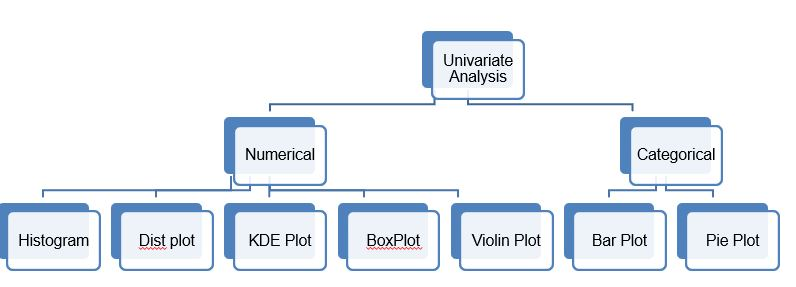

In [ ]:
from IPython.display import Image
Image(filename='Univariate.JPG',width=600,height=200)

### Univariate Analysis

In [ ]:
list_country = [ "India", "Srilanka", "England", "Australia" ]
Icc_Ranking = [ 1, 5, 2, 3 ]
 
Country_Ranks = zip(list_country, Icc_Ranking)
 
print(set(Country_Ranks))

{('Australia', 3), ('Srilanka', 5), ('India', 1), ('England', 2)}


1. flatten()- method of np.array. 

In [ ]:
a = np.array( [ (1,7,3,4),(3,2,4,1) ])
a

array([[1, 7, 3, 4],
       [3, 2, 4, 1]])

In [ ]:
a.flatten()

array([1, 7, 3, 4, 3, 2, 4, 1])

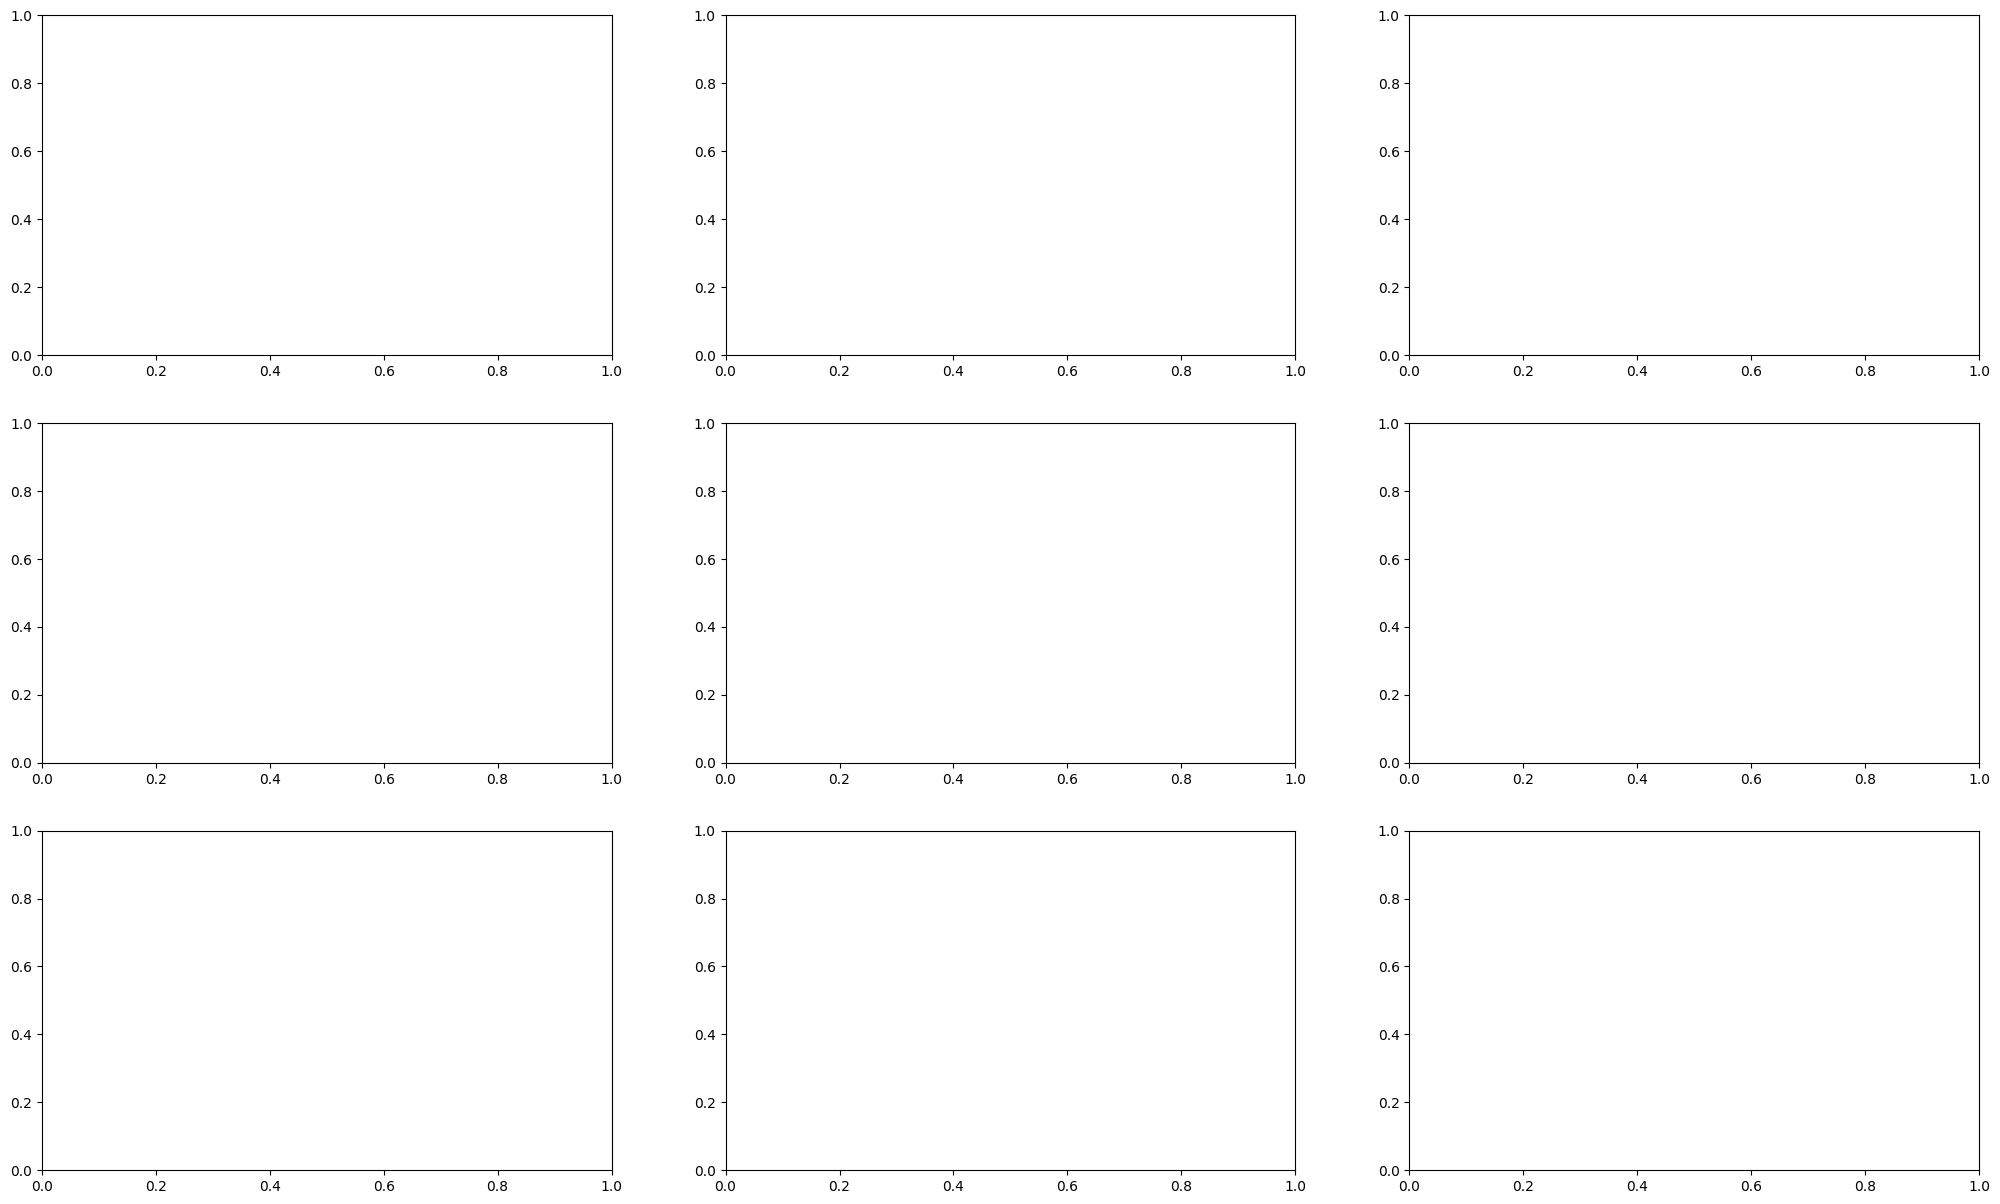

In [ ]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

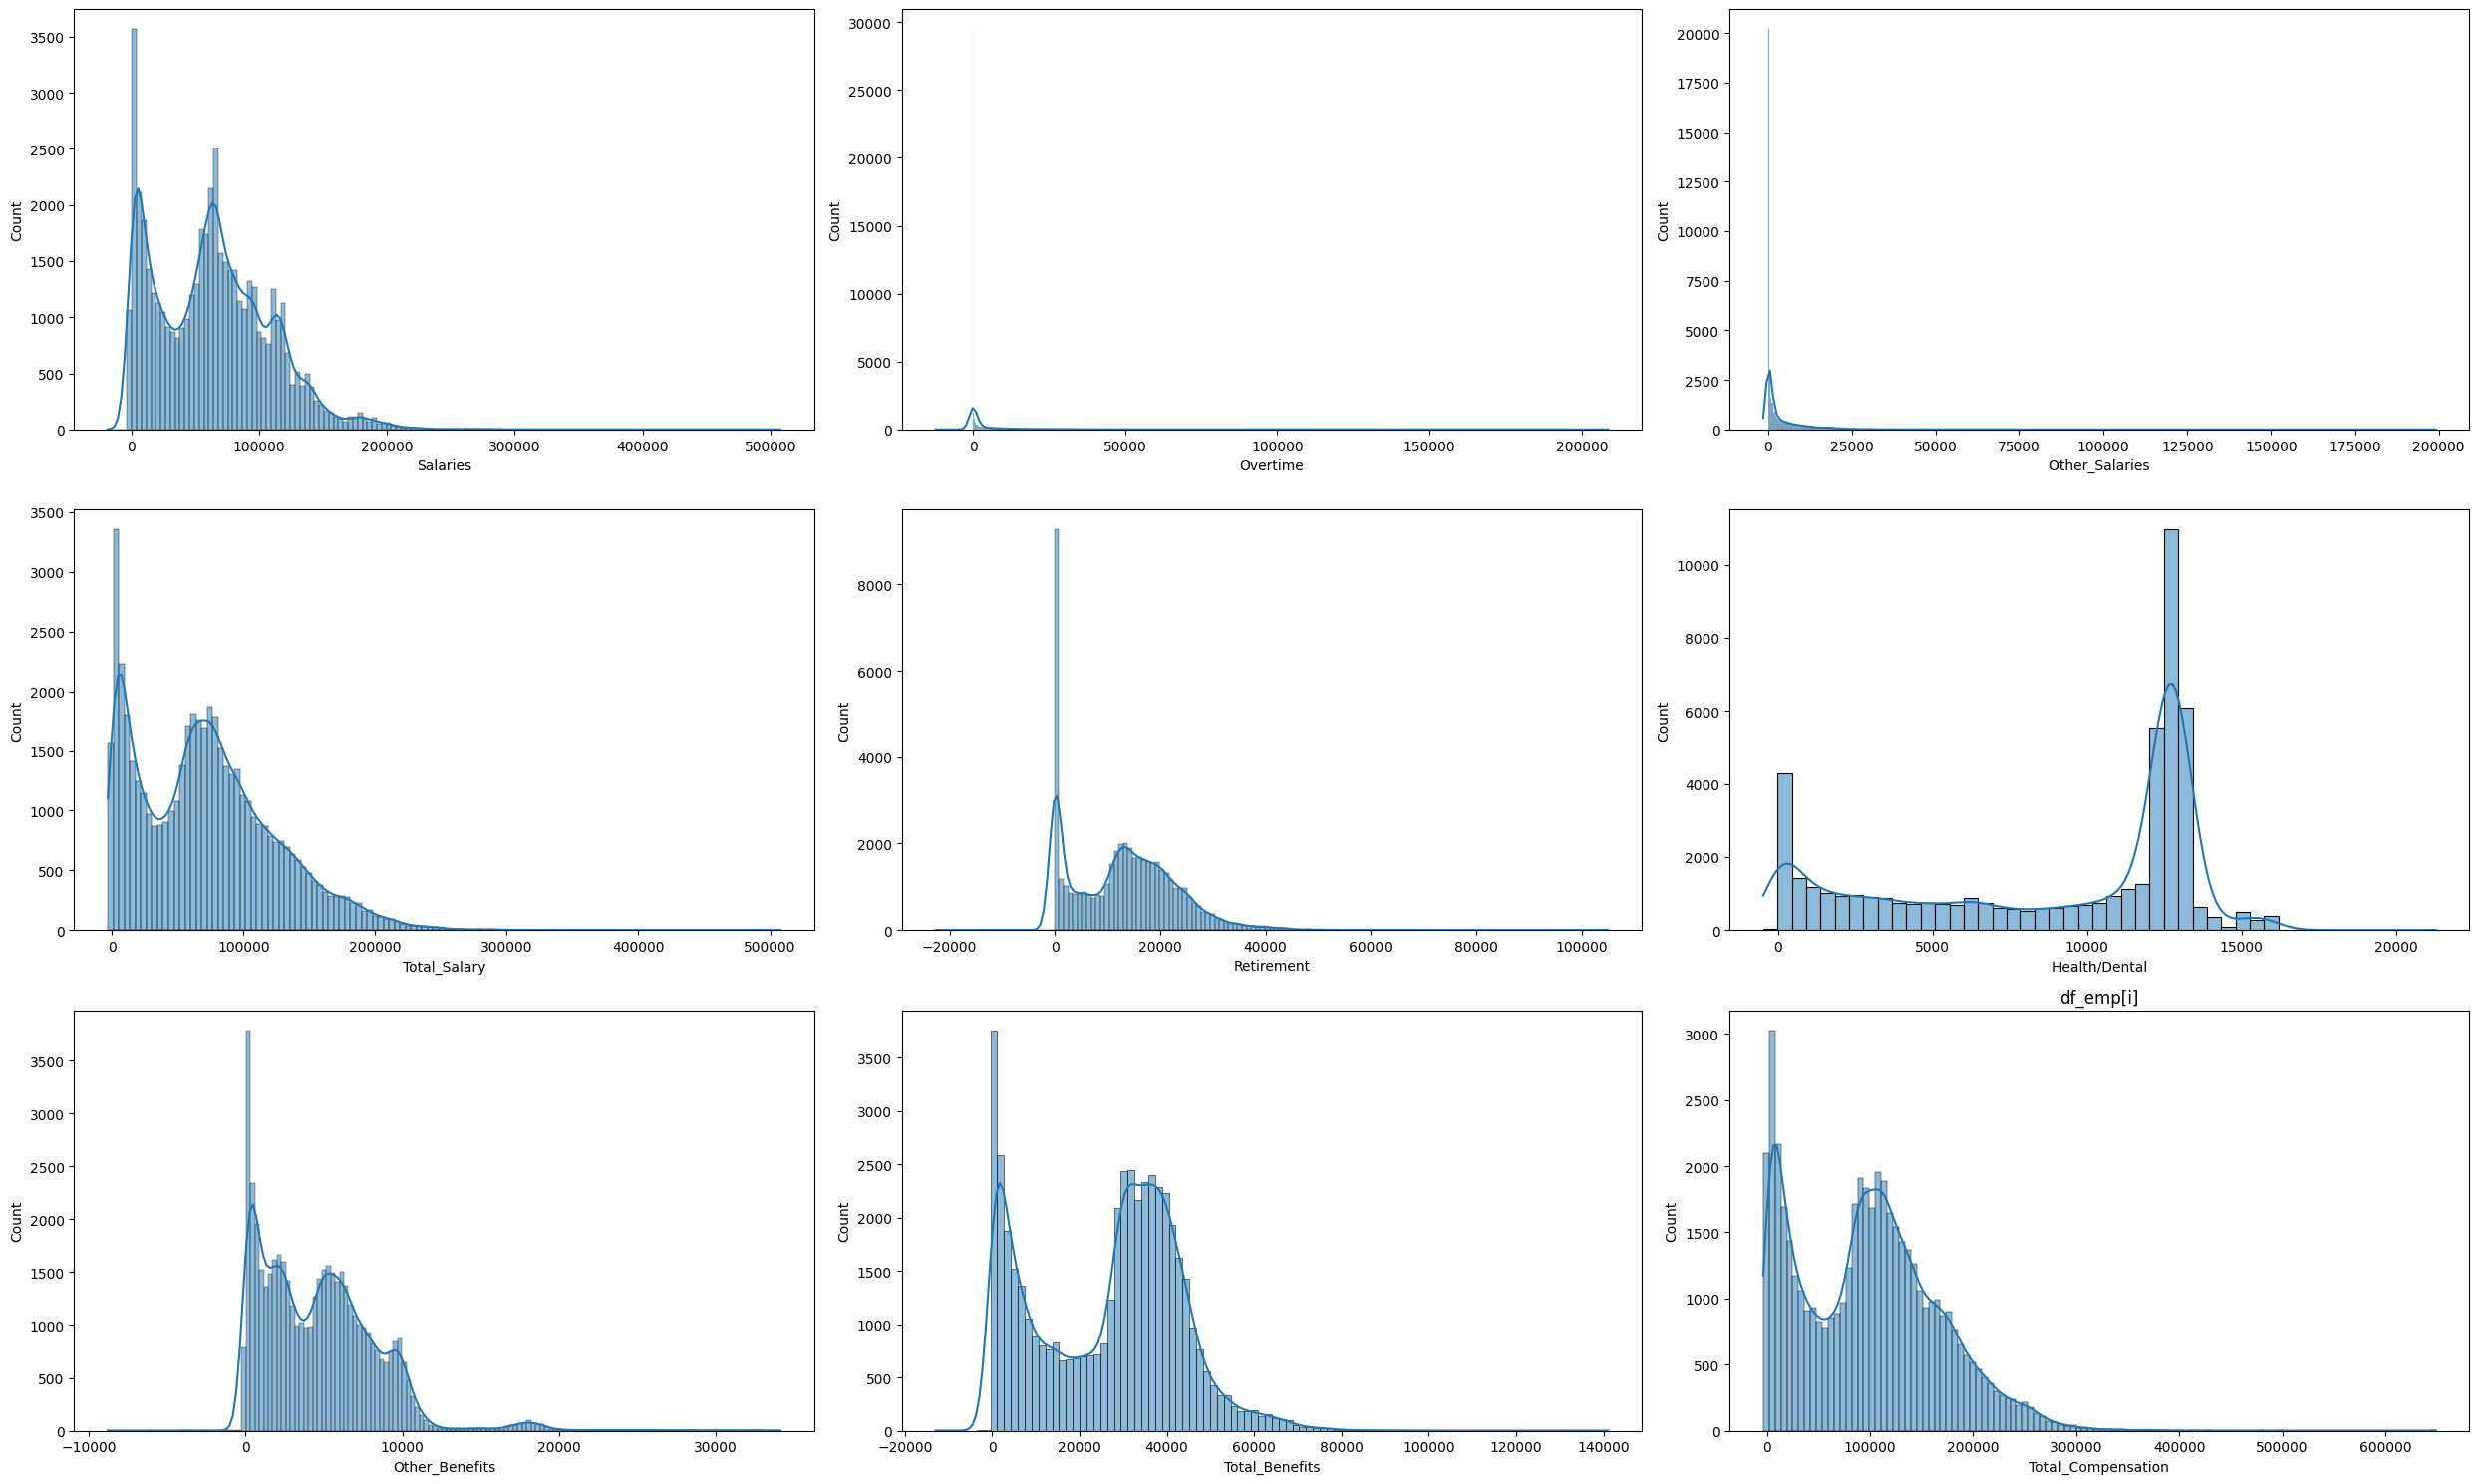

In [ ]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df_emp[i], ax=subplot,kde=True)
    plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

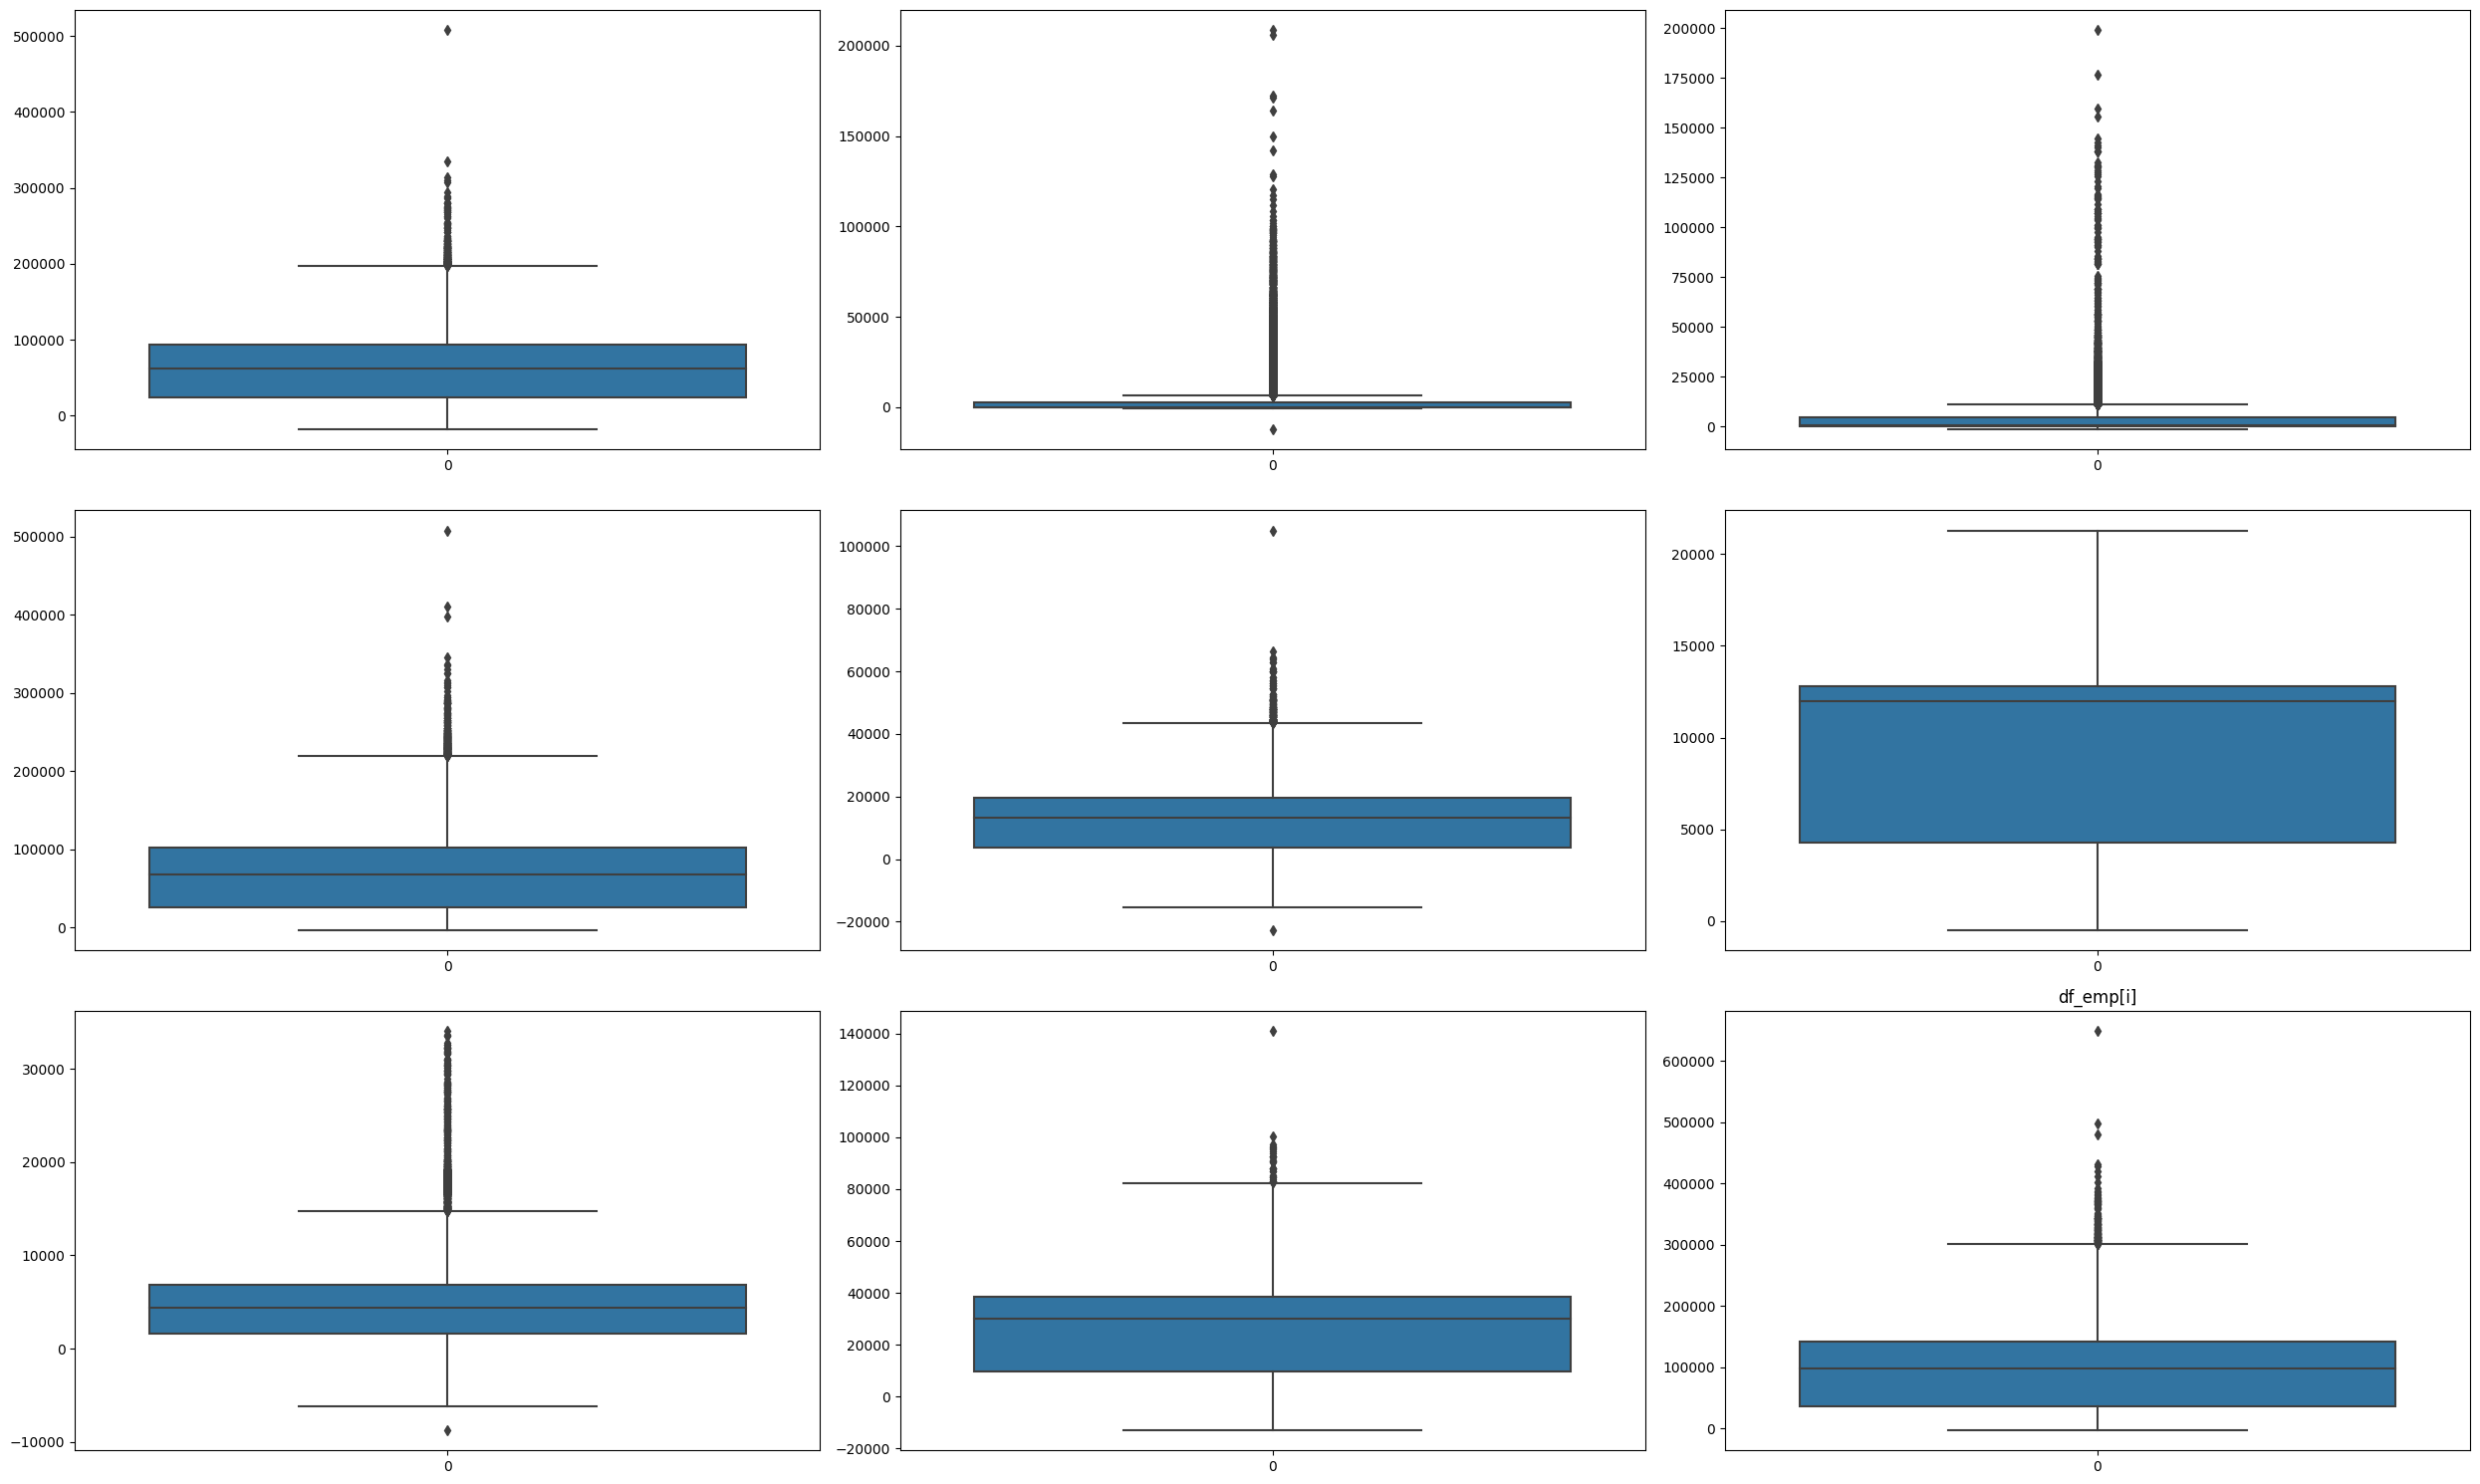

In [ ]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_emp[i], ax=subplot)
    plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

Almost all the variables have outliers and they have to be treated

### Bivariate Analysis

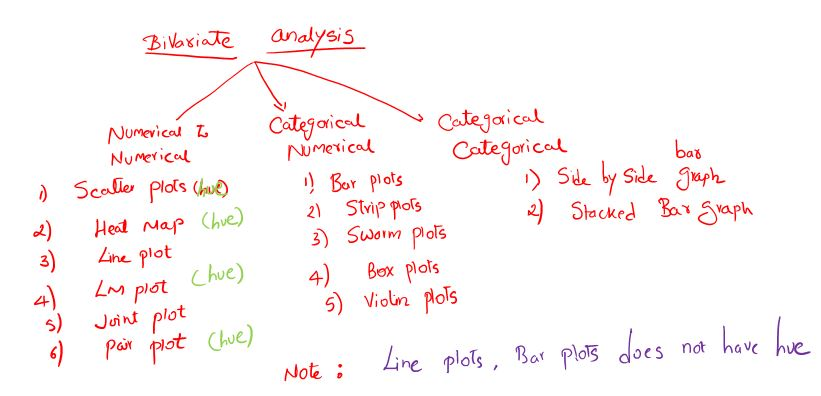

In [ ]:
from IPython.display import Image
Image(filename='Bivariate.JPG',width=600,height=300)

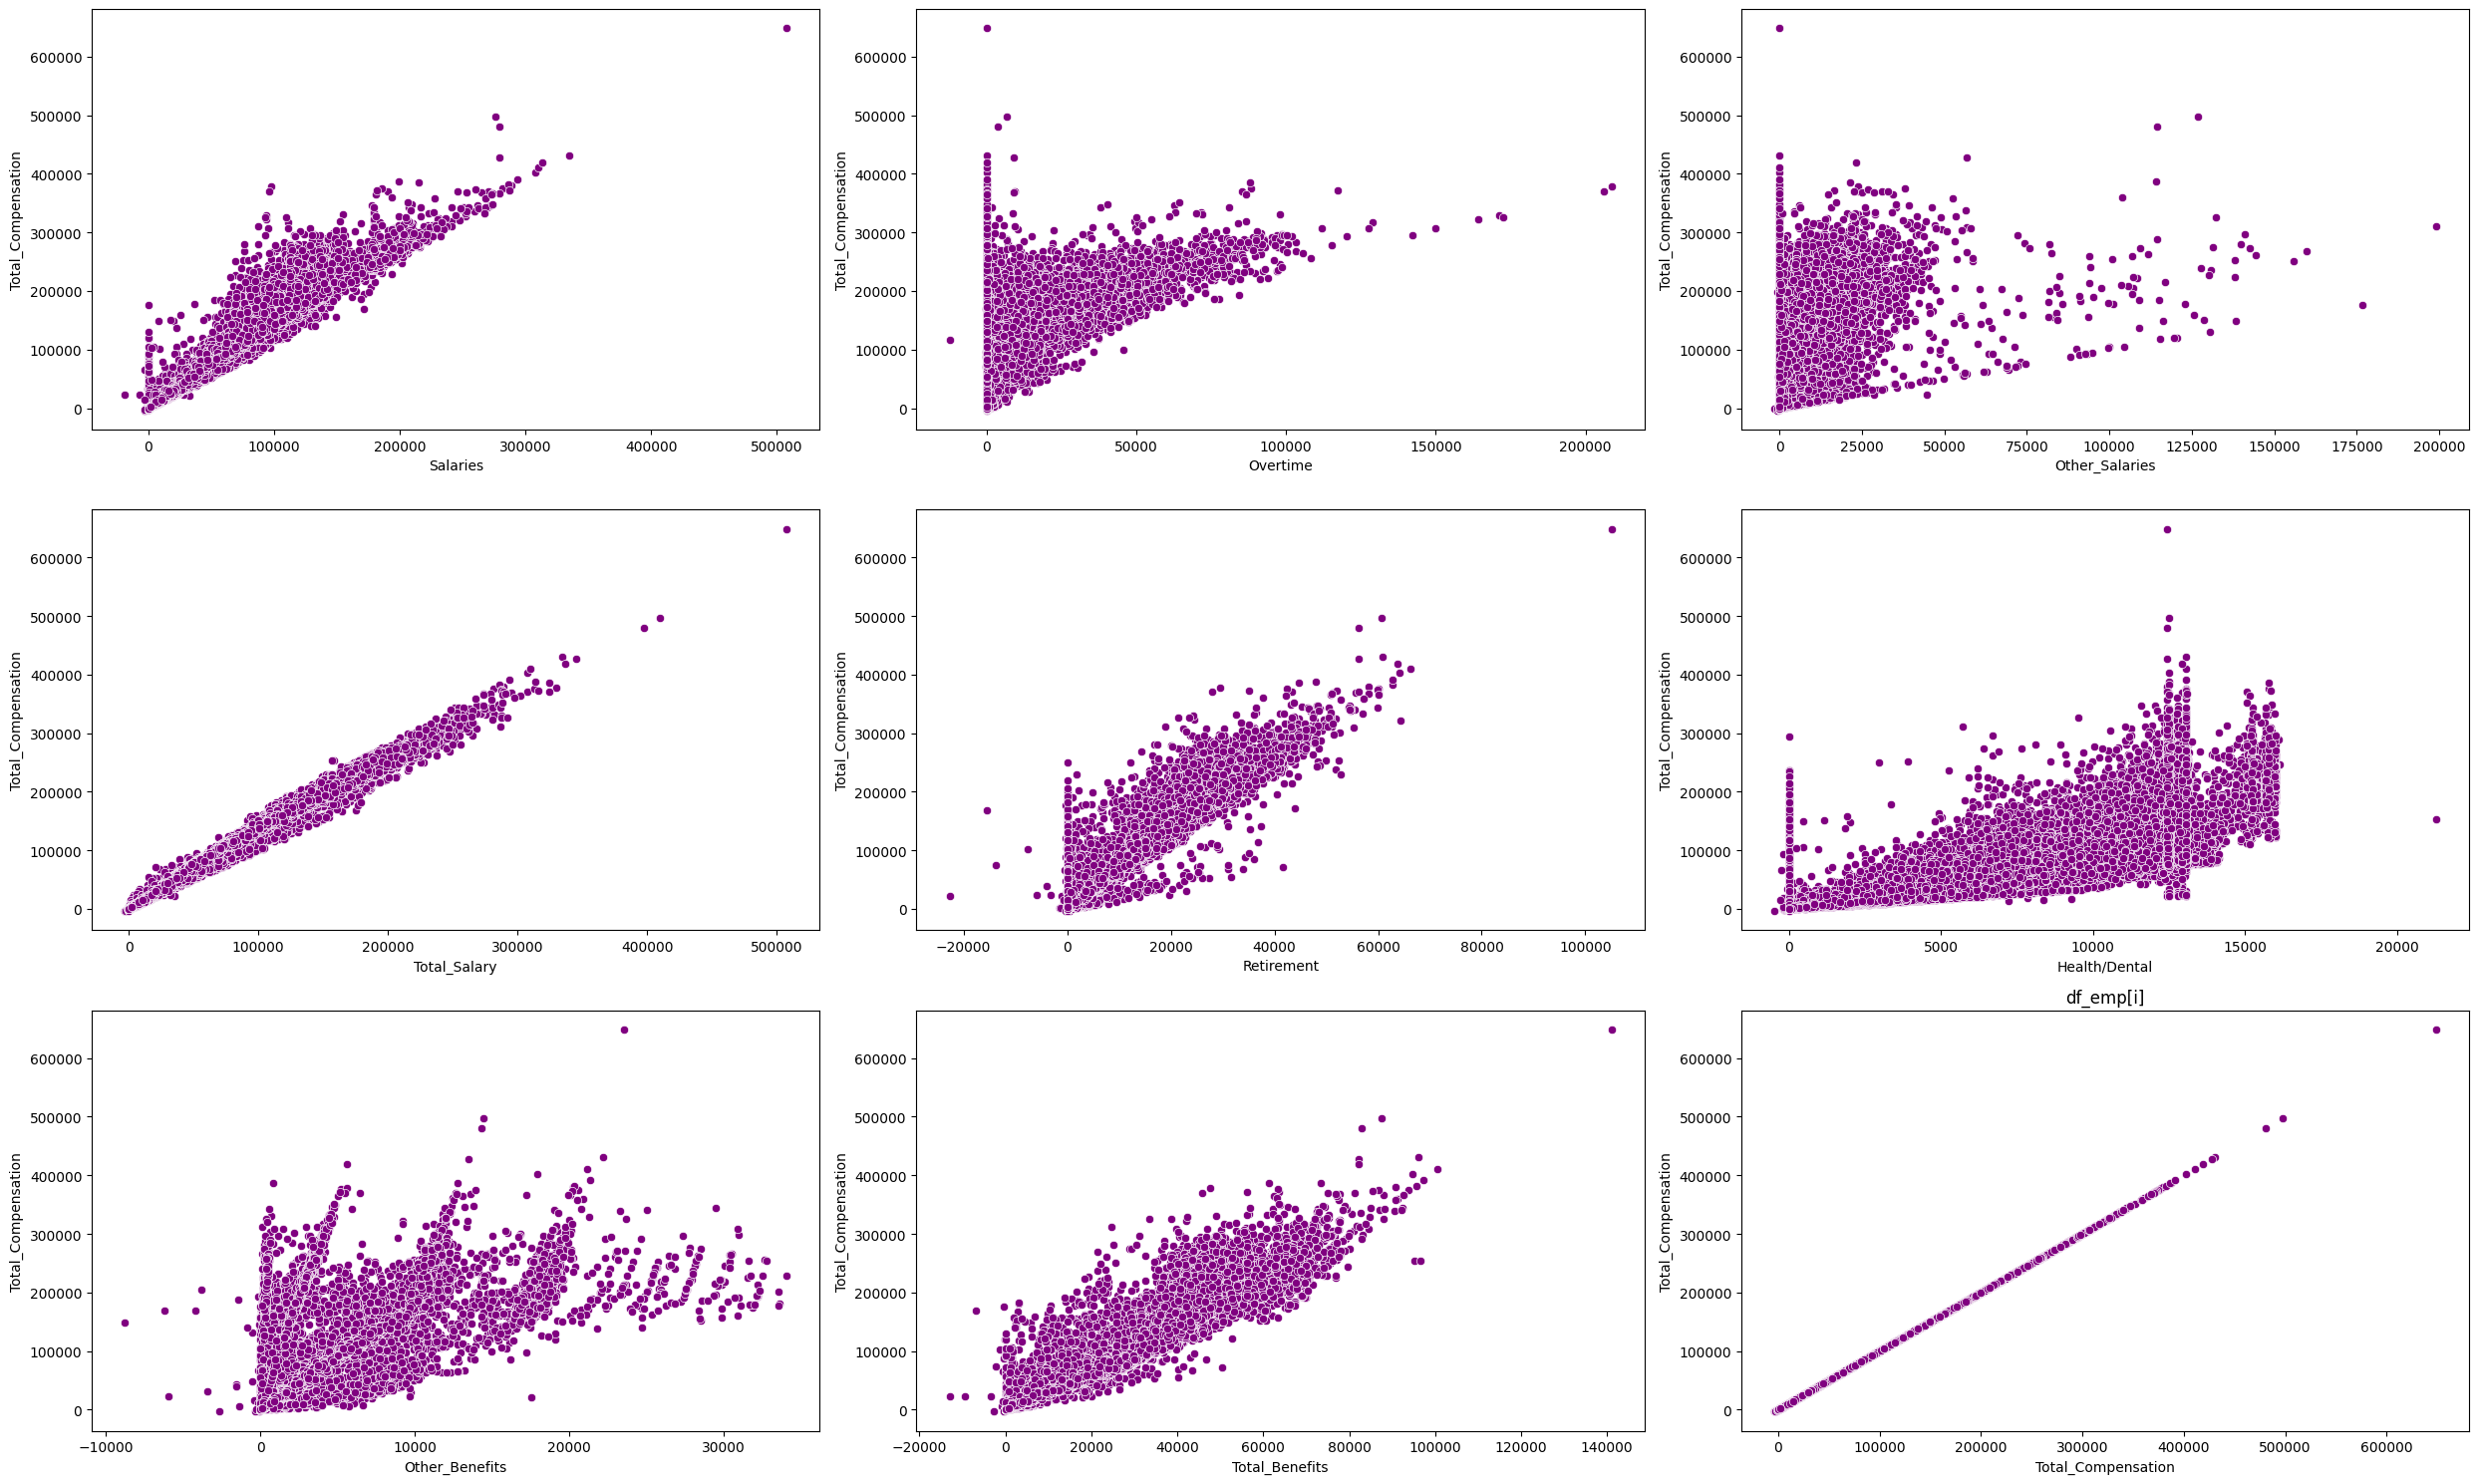

In [ ]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(x=df_emp[i],y=df_emp['Total_Compensation'], ax=subplot,color='purple')
    #plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

1. All the variables are showing very high correlation with Target variable. 
2. But be cautious when the correlation is very high between the variables.


**Lets check the correlation between Independent variable**

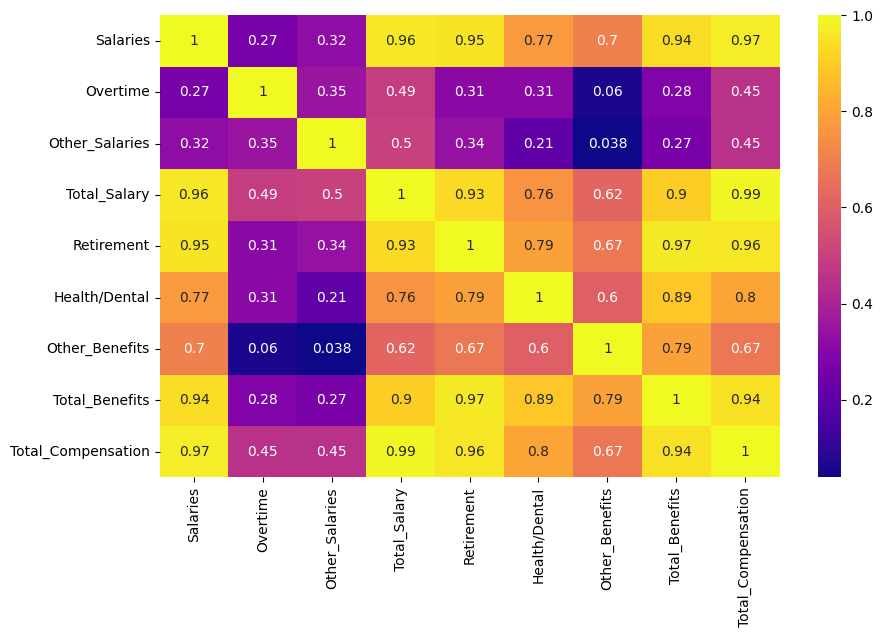

In [ ]:
sns.heatmap(df_emp.corr(),annot=True,cmap="plasma")
plt.show()

1. There is a inherent problem of multicollinearity in the dataset.
2. Predictors should not be highly correlated.
3. Predictors are highly correlated with dependent variable -Total compensation.

## Outliers 

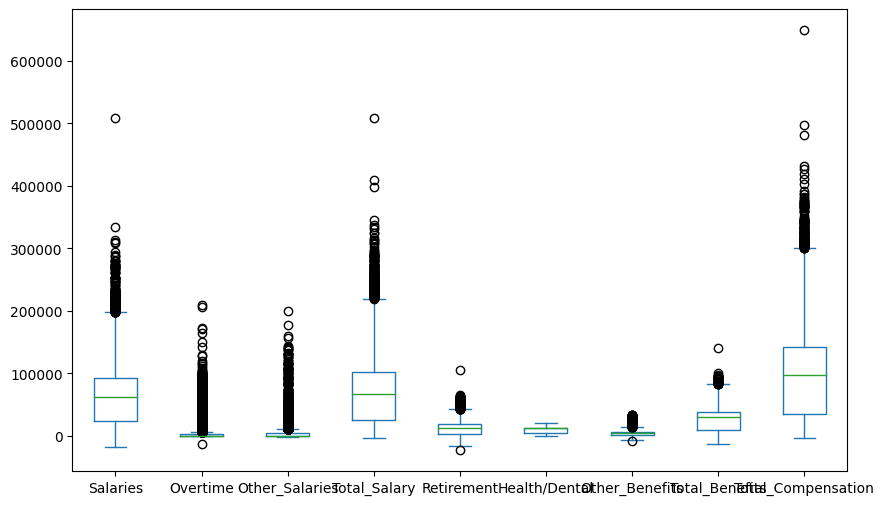

In [ ]:
df_emp.plot(kind='box')
plt.show()

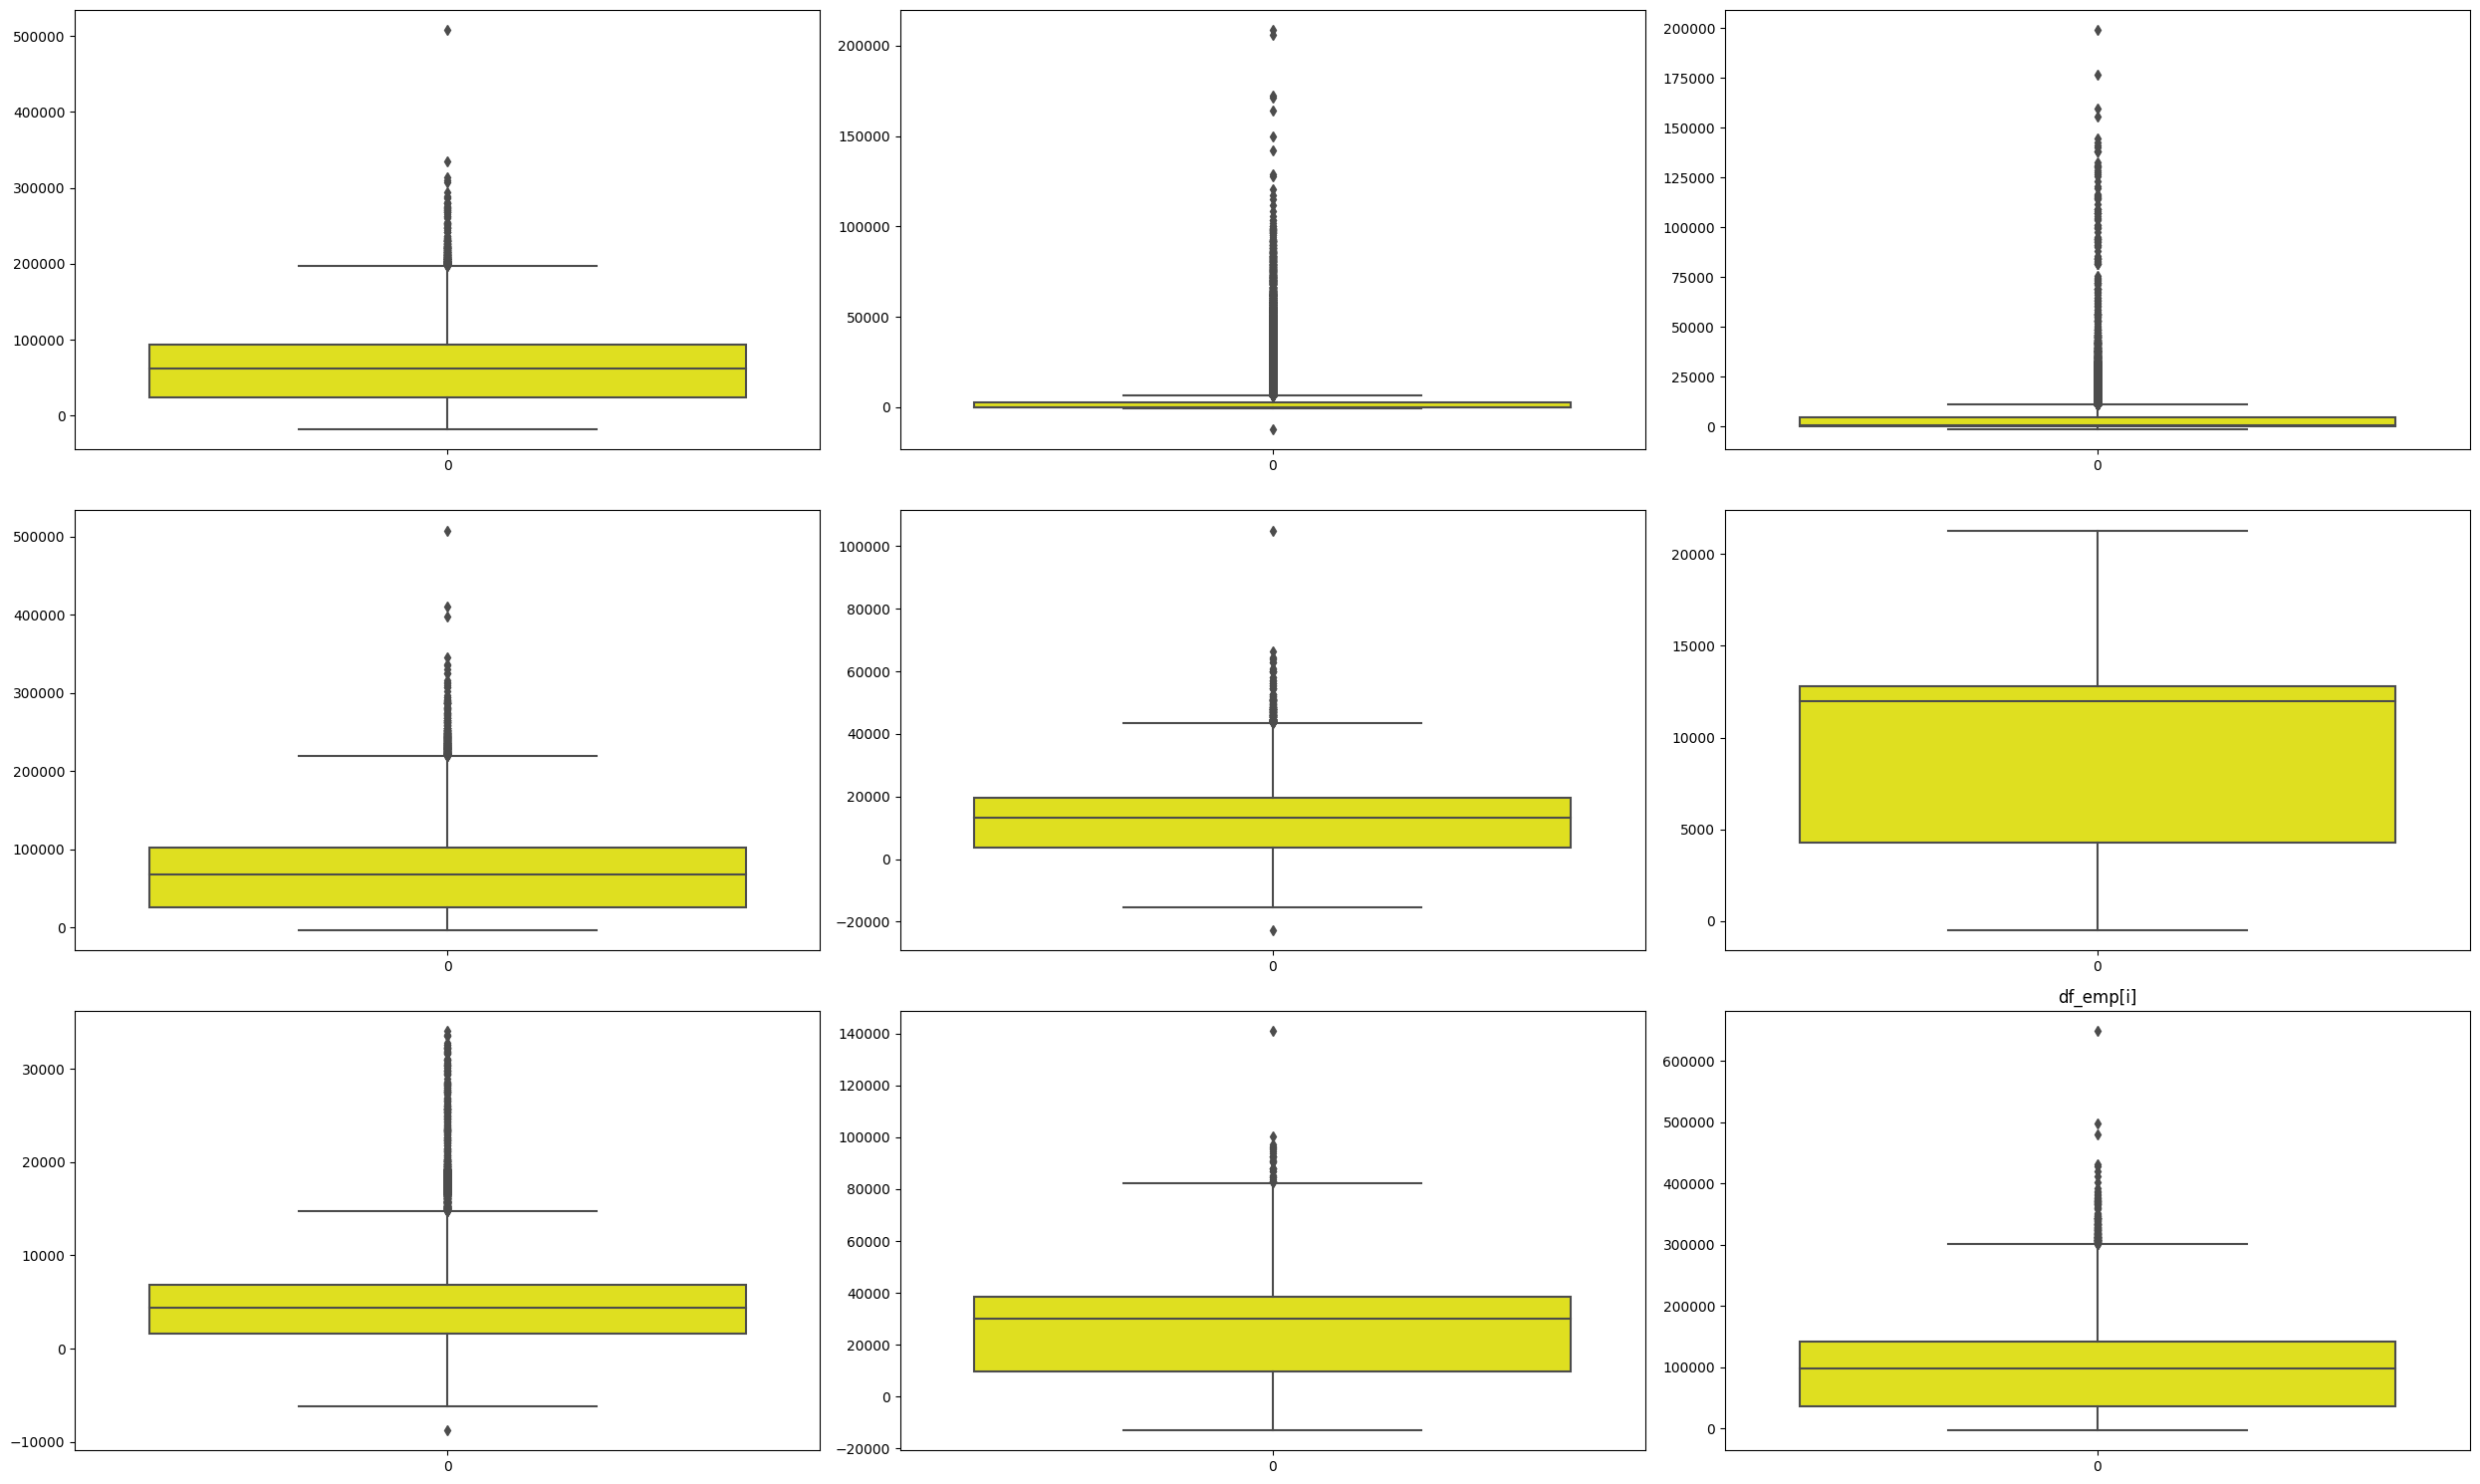

In [ ]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_emp[i],ax=subplot,color='yellow')
    plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

### Missing Value

In [ ]:
df_emp.isnull().sum()

Year_Type             0
Salaries              0
Overtime              0
Other_Salaries        0
Total_Salary          0
Retirement            0
Health/Dental         0
Other_Benefits        0
Total_Benefits        0
Total_Compensation    0
dtype: int64

In [ ]:
# to know the percent of missing values
(df_emp.isnull().sum() /df_emp.index.size) *100 

Year_Type             0.0
Salaries              0.0
Overtime              0.0
Other_Salaries        0.0
Total_Salary          0.0
Retirement            0.0
Health/Dental         0.0
Other_Benefits        0.0
Total_Benefits        0.0
Total_Compensation    0.0
dtype: float64

### Remove the outliers

1. iqr = q3-q1
2. Value > q3+1.5 * iqr
3. value < q1-1.5 * iqr

In [ ]:
df_emp.shape

(50000, 10)

In [ ]:
q1 =df_emp.quantile(0.25)
q3= df_emp.quantile(0.75)
iqr=q3-q1

upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr

In [ ]:
upper_limit

Salaries              197558.53375
Overtime                6622.20625
Other_Salaries         11192.57500
Total_Salary          219380.26625
Retirement             43612.26000
Health/Dental          25602.53500
Other_Benefits         14752.39000
Total_Benefits         82416.01500
Total_Compensation    300770.85500
dtype: float64


1. '~' returns the values that do not satisfy the given conditions 
i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
2. '|' is used as 'OR' operator on multiple conditions   
3. 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)

In [ ]:
df_emp[~((df_emp < (lower_limit)) | (df_emp > (upper_limit)))]

,Year_Type,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,76536.95,NaN,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
...,...,...,...,...,...,...,...,...,...,...
49995,Fiscal,100222.50,NaN,600.00,117988.63,18763.05,13068.80,9406.86,41238.71,159227.34
49996,Fiscal,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,Fiscal,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,Fiscal,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43


1. Return the output row by row. Instead of Column by column.
2. Check rowwise, if the condition is met and return that data. In the second row, where the condition is met, retun the data. If the condition is not met then do not return the data.
3. any means- if the condition is met anywhere, return this data.
4. ~: Not represents returning all the values which are false.
5. ex: not(false) = True. , Not(True) = False.
6. .any(axis=1) : represents checking of the condition row wise. And whenever this condition is met, it returns the data.
7. Return the data which is the layer.  
8. if any() is not used then it will check one column with entire dataset. We need to avoid that.

In [ ]:
df_emp[~((df_emp < (lower_limit)) | (df_emp > (upper_limit))).any(axis=1)]

,Year_Type,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
3,Fiscal,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
5,Calendar,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84
...,...,...,...,...,...,...,...,...,...,...
49994,Calendar,10663.05,0.00,65.93,10728.98,0.00,3152.42,879.17,4031.59,14760.57
49996,Fiscal,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,Fiscal,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,Fiscal,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43


In [ ]:
#~(df_emp > upper_limit ) | (df_emp < lower_limit).any(axis=1)
df_emp = df_emp[~((df_emp < (lower_limit)) | (df_emp > (upper_limit))).any(axis=1)]
df_emp.head()


,Year_Type,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
3,Fiscal,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
5,Calendar,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84


In [ ]:
import pandas as pd
dt = {'x1':[1,0,1,0],
      'x2':[1,0,0,0],
      'x3':[0,0,0,0]
}
      
df = pd.DataFrame(dt,columns=['x1','x2','x3'])
df



,x1,x2,x3
0,1,1,0
1,0,0,0
2,1,0,0
3,0,0,0


In [ ]:
df.any() # this checks column wise

x1     True
x2     True
x3    False
dtype: bool

In [ ]:
df.any(axis =1) # this checks row wise

0     True
1    False
2     True
3    False
dtype: bool

In [ ]:
df_emp.shape

(37721, 10)

In [ ]:
# def cap_outlier(val):
#     Q1, Q3 = np.quantile(val, [.25, .75])
#     IQR = Q3 - Q1
#     LL = Q1 - 1.5*IQR
#     UL = Q3 + 1.5*IQR
#     return LL, UL

In [ ]:
df_emp.columns

Index(['Year_Type', 'Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary',
       'Retirement', 'Health/Dental', 'Other_Benefits', 'Total_Benefits',
       'Total_Compensation'],
      dtype='object')

In [ ]:
cols

['Salaries',
 'Overtime',
 'Other_Salaries',
 'Total_Salary',
 'Retirement',
 'Health/Dental',
 'Other_Benefits',
 'Total_Benefits',
 'Total_Compensation']

In [ ]:
# for i in cols:
#     LL, UL = cap_outlier(df_emp[i])
#     df_emp[i] = np.where(df_emp[i]> UL, UL, df_emp[i])
#     df_emp[i] = np.where(df_emp[i]< LL, LL, df_emp[i])

In [ ]:
df_emp.shape

(37721, 10)

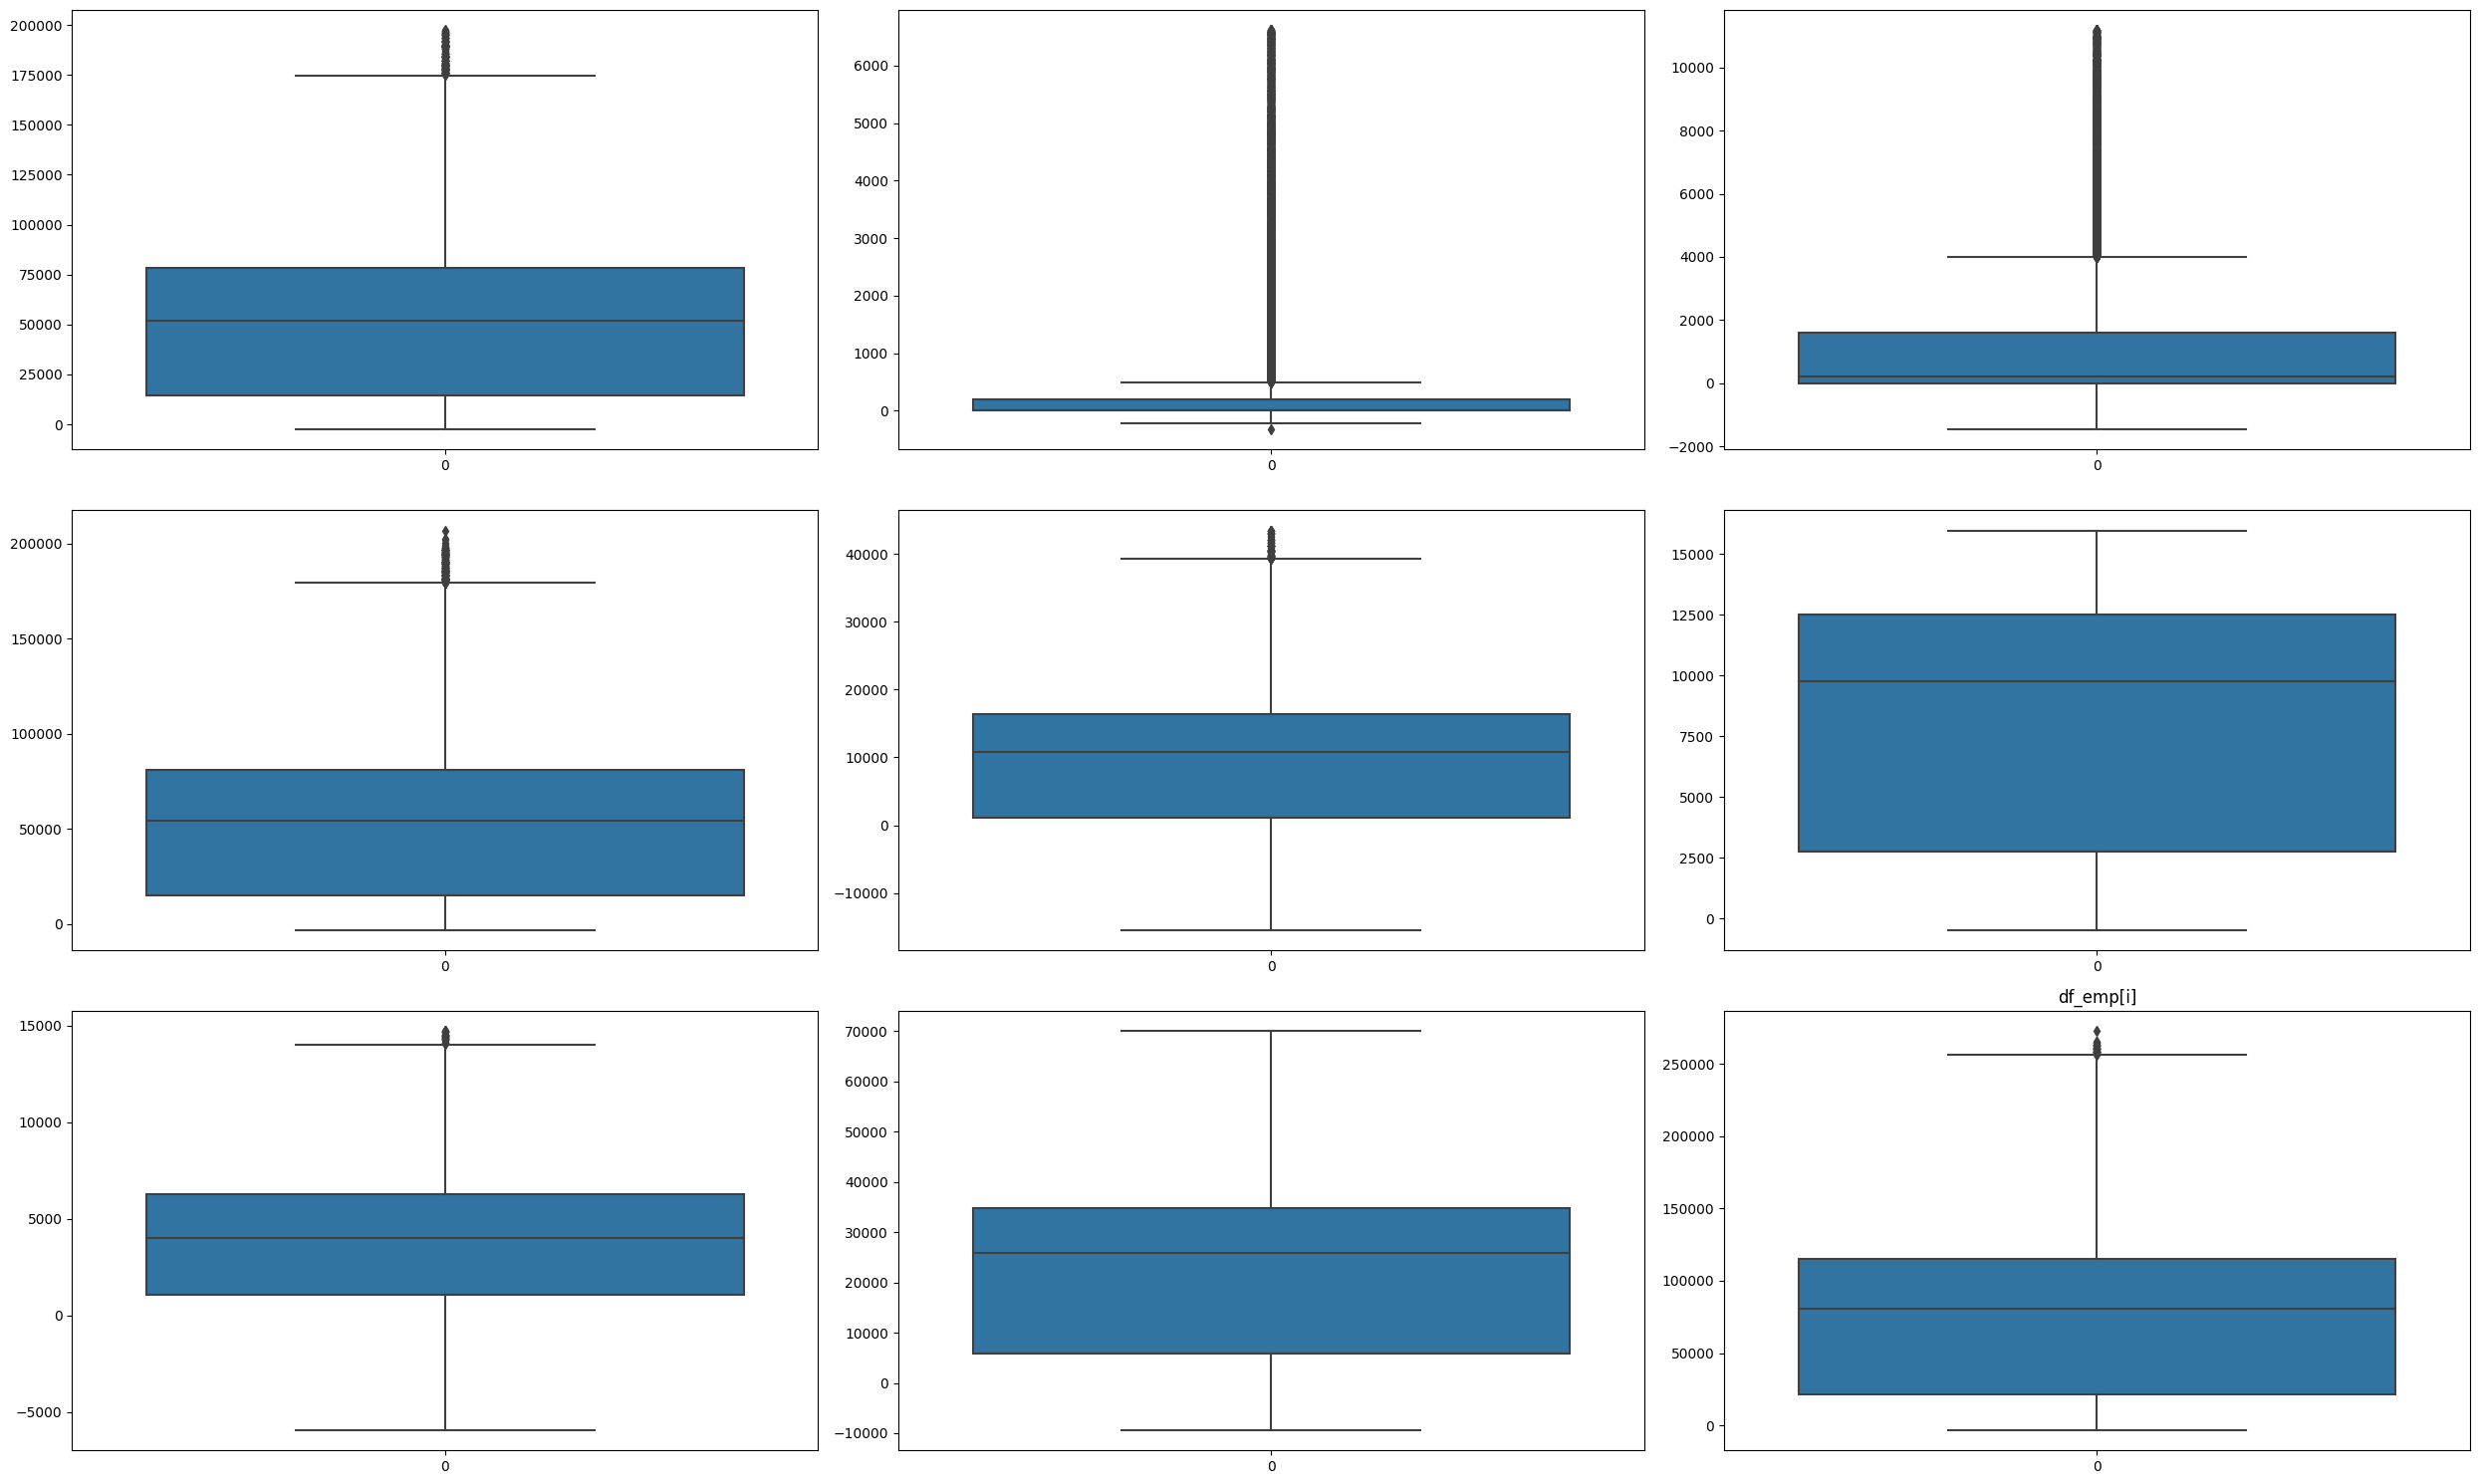

In [ ]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_emp[i], ax=subplot)
    plt.title('df_emp[i]')

plt.tight_layout()
plt.show()